# Predicting heart disease using machine learning

This notebook look into using Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease or not.

We are going to take the following apporch :
1. Problem Defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data 

The Original data come from the the Cleavland data from the UCI Machine Learning Repository.
..
There is also version available on Kaggle.
..

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
..


## Preparing the tools
We're going to use pandas, NumPy, Matplotlib for data analysis and manipultion  

In [87]:
# Import all the tools we need 

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# We want all plots to appear inside the notebook
%matplotlib inline

# Model from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

## Load Data

In [5]:
df = pd.read_csv('heart.csv')

In [8]:
df.shape # (Rows, Colunns)

(1025, 14)

## Data Exploration (EDA)

The goal here is find out more about the data and beacome subject matter expert on the dataset you're working with

1. What questions are you tring to solve 
2. What kind of data do we have and how do we treat differeat types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them ?
5. How can you add, change or remove features to get more out of your data?

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [11]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

> Have Heart Diesease = 526

> Doesn't have Heart Diesease = 499

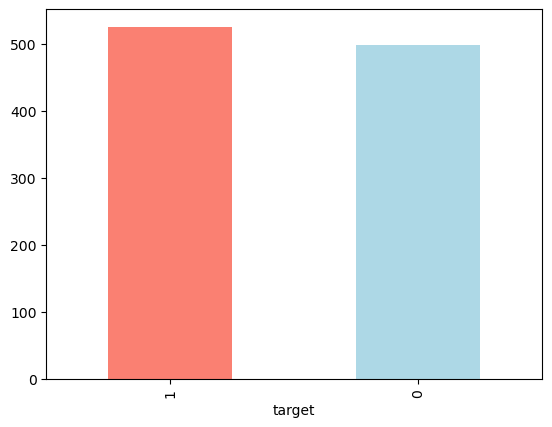

In [13]:
df['target'].value_counts().plot(kind="bar", color=['salmon', 'lightblue']);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

> No Null values present in the Dataset

### Heart Disease Frequency Acc. to Sex

In [17]:
df.sex.value_counts()

sex
1    713
0    312
Name: count, dtype: int64

> Males = 713 
> Females = 312

In [19]:
# Compare target column with sex column 
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


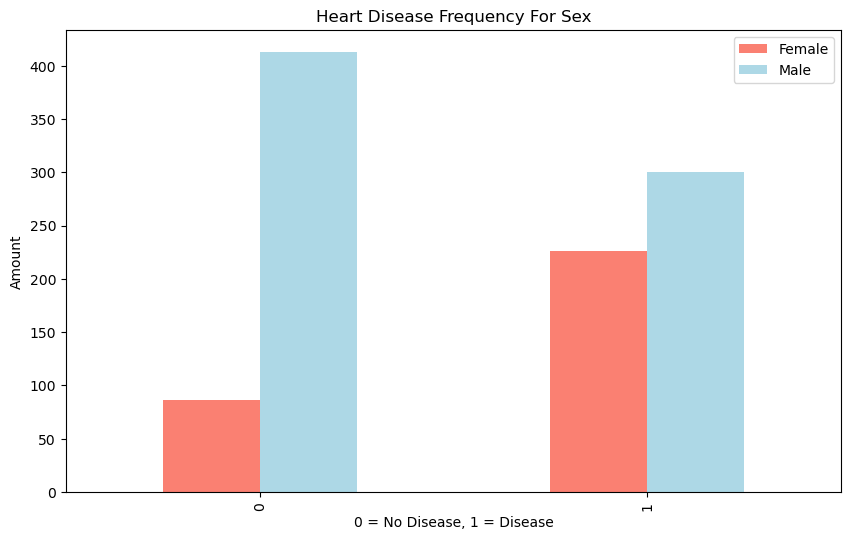

In [21]:
# Create a plot for crosstab
pd.crosstab(df.target, df.sex).plot(kind = "bar",
                                    figsize = (10,6),
                                    color = ["salmon", "lightblue"])
plt.title("Heart Disease Frequency For Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);


### Age vs. Max Heart Rate for Heart Disease

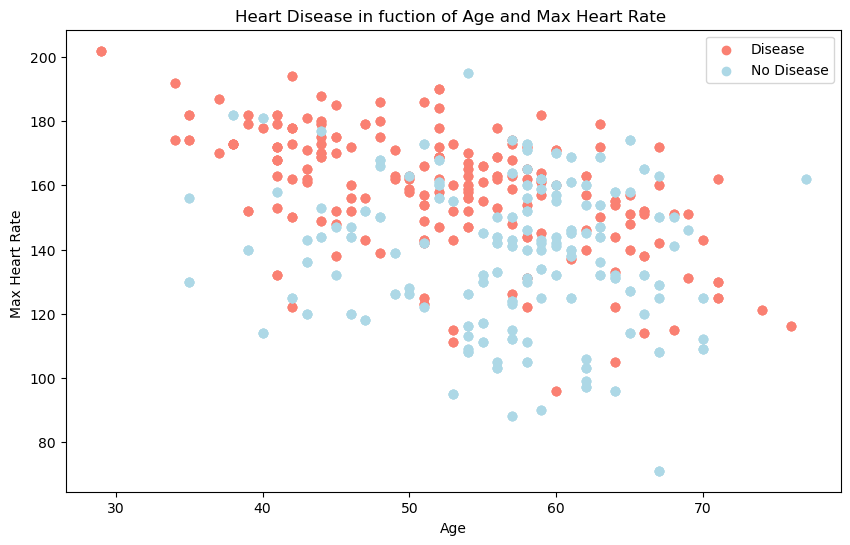

In [24]:
# Create another figure 
plt.figure (figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target == 1],
            df.thalach[df.target == 1],
            c = "salmon")
# Scatter with negative examples
plt.scatter(df.age[df.target == 0],
            df.thalach[df.target == 0],
            c = "lightblue");

plt.title("Heart Disease in fuction of Age and Max Heart Rate ")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate ")
plt.legend(["Disease", "No Disease"]);

In [25]:
# Make Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


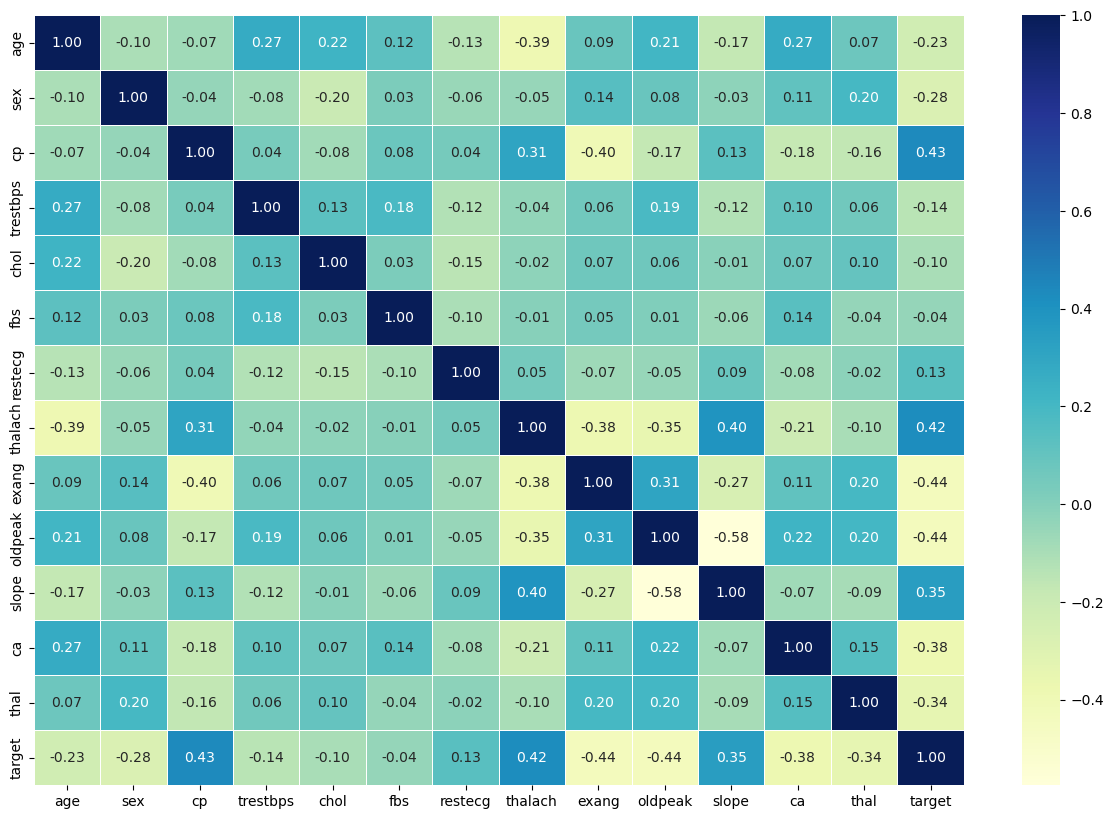

In [26]:
# Correlation Matrix Visualisation

corr_matrix  = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt='.2f',
                 cmap="YlGnBu");

## Modelling


In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [28]:
# Split data into X and y

X = df.drop("target", axis = 1)
y = df["target"]

In [29]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [30]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [31]:
# Split data into train and test sets

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [32]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,41,1,2,130,214,0,0,168,0,2.0,1,0,2
71,61,1,0,140,207,0,0,138,1,1.9,2,1,3
106,51,1,0,140,299,0,1,173,1,1.6,2,0,3
270,43,1,0,110,211,0,1,161,0,0.0,2,0,3


In [34]:
y_train

835    0
137    1
534    1
495    1
244    1
      ..
700    1
71     0
106    0
270    1
860    0
Name: target, Length: 820, dtype: int64

>We're going use the 3 different machine learning model
>1. Logistic Regression
>2. K-Nearest Neighbours Classifier
>3. Random Forest Classifier

In [106]:
# Put models on the dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models 
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluate given machine learning models.
    """
    # Set random seed 
    np.random.seed(42)
    
    # make dictionary to keep model scores
    model_scores = {}
    trained_models = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data 
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
        trained_models[name] = model
    return model_scores, trained_models

In [107]:
model_scores, trained_models= fit_and_score(models = models, 
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)

model_scores

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

### Model Comparison

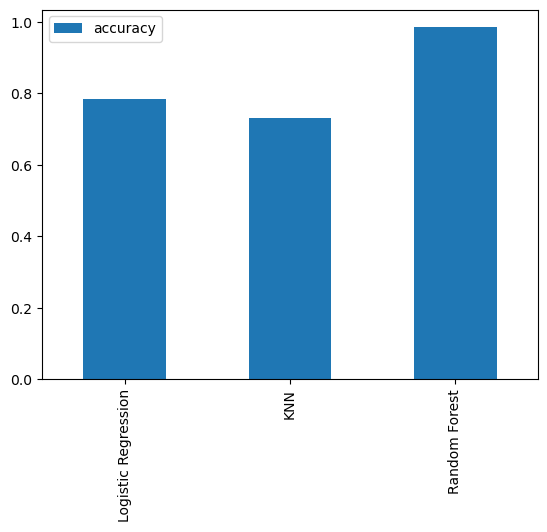

In [44]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar();

### Lets Tune our models for more better accuracy

* Hyperparameter tuning
* Feature importance 
* Confusion Matrix
* Cross-validation
* Precision
* Recall 
* F1 score
* Classification report 
* ROC Curve
* AOC 

> ** Since we got the best model i.e Random Forest we can conclude our work and can go with Random Forest But, also what we can do is tunning logistic regression since it is sencond best fit model and we can drop KNN

### Hyperparameter tuning With RandomSearchCV


In [48]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

In [53]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [54]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [55]:
rs_log_reg.score(X_test,y_test)

0.7853658536585366

### Hyperparameter tuning With GridSearchCV

In [60]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}|

In [61]:
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                                param_grid=log_reg_grid,
                                cv=5,
                                verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [65]:
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [68]:
gs_log_reg.score(X_test,y_test)

0.7853658536585366

In [69]:
model_scores

{'Logistic Regression': 0.7853658536585366,
 'KNN': 0.7317073170731707,
 'Random Forest': 0.9853658536585366}

In [70]:
# Make predictions with our tuned model
y_preds = gs_log_reg.predict(X_test)

In [71]:
y_preds

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [73]:
 y_test

527    1
359    1
447    0
31     1
621    0
      ..
832    1
796    1
644    1
404    0
842    0
Name: target, Length: 205, dtype: int64

In [83]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[71 31]
 [13 90]]


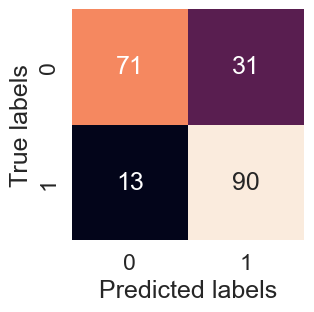

In [93]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap
    """
    
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot = True,
                     cbar = False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
plot_conf_mat(y_test, y_preds)

In [109]:
print("Classification Report for Tuned Logistic Regression Model:")
print(classification_report(y_test, y_preds))

Classification Report for Tuned Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



In [108]:
random_forest_model = trained_models["Random Forest"]
y_pred_rf = random_forest_model.predict(X_test)
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Random Forest Model:")
print(classification_rep_rf)

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### Calculate evaluation metrics using __Cross-validation__

In [111]:
# Check best hyperparameters 
gs_log_reg.best_params_

{'C': 1.623776739188721, 'solver': 'liblinear'}

In [112]:
# Create a new classifier with best parameters 
clf = LogisticRegression(C = 1.623776739188721,
                         solver = "liblinear")

In [ ]:
# Cross-validation accuracy

In [ ]:
# Cross-validation precision

In [ ]:
# Cross-validation recall

In [ ]:
# Cross-validation f1-score